In [155]:
from halotools.sim_manager import CachedHaloCatalog, FakeSim
from halotools.empirical_models import PrebuiltHodModelFactory, Zheng07Cens, Zheng07Sats, TrivialPhaseSpace, NFWPhaseSpace, HodModelFactory
from halotools.mock_observables import return_xyz_formatted_array
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import inv
import astropy

In [2]:
#halocat = CachedHaloCatalog(simname='bolplanck',redshift = 0.0)
halocat = CachedHaloCatalog(fname = '/Users/lmezini/.astropy/cache/halotools/halo_catalogs/bolplanck/rockstar/hlist_1.00231.list.halotools_v0p4.hdf5',update_cached_fname = True)
#halocat = CachedHaloCatalog(fname = '/Users/lmezini/Downloads/hlist_1.00231.list.halotools_v0p1.hdf5',update_cached_fname = True)
#halocat = CachedHaloCatalog(fname='/Users/lmezini/.astropy/cache/halotools/halo_catalogs/SMDPL/rockstar/2019-07-03-18-38-02-9731.dat.my_cosmosim_halos.hdf5')
halocat.redshift = 0.
#cens_occ_model.param_dict['logMmin'] = param_samples[i][0]#Mmin_val[i]
#cens_occ_model.param_dict['sigma_logM'] = param_samples[i][1]#sigma_val[i]
#sats_occ_model.param_dict['alpha'] = param_samples[i][2]#alpha_val[i]
#sats_occ_model.param_dict['logM0'] = param_samples[i][3]#M0_val[i]
#sats_occ_model.param_dict['logM1'] = param_samples[i][4]#M1_val[i]
#model_instance = HodModelFactory(centrals_occupation = cens_occ_model, centrals_profile = cens_prof_model, 
#                            satellites_occupation = sats_occ_model, satellites_profile = sats_prof_model)

In [396]:
model = PrebuiltHodModelFactory('zheng07',threshold=-20,z=0)
model.param_dict['logMmin'] = 12.24
model.param_dict['sigma_logM'] = 0.84
model.param_dict['alpha'] = 1.05
model.param_dict['logM0'] = 12.19583311183421
model.param_dict['logM1'] = 13.19
halo_mass = np.logspace(10, 15, 200)
mean_ncen = model.mean_occupation_centrals(prim_haloprop = halo_mass)
mean_nsat = model.mean_occupation_satellites(prim_haloprop = halo_mass)

(10000000000, 10000000000000000)

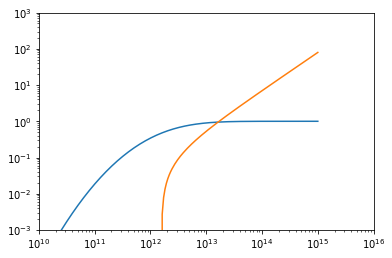

In [389]:
plt.loglog(halo_mass,mean_ncen)
plt.loglog(halo_mass,mean_nsat)
plt.ylim(0.001,1000)
plt.xlim(10**10,10**16)

In [380]:
for i in range(1):
    model.populate_mock(halocat = halocat)
    halo_table = model.mock.halo_table
    gal_table = model.mock.galaxy_table
    data=np.zeros(len(halo_table))
    #col = astropy.table.Column(name='Ngals',data=np.zeros(len(halo_table)))
    #halo_table.add_column(col,rename_duplicate=True)
    for j in range(len(halo_table)):
        mask=gal_table['halo_hostid']==halo_table['halo_hostid'][j]
        data[j]+=len(gal_table[mask])
    col = astropy.table.Column(name='Ngals',data=data)
    halo_table.add_column(col,rename_duplicate=True)

In [381]:
halo_table

halo_rvir,halo_hostid,halo_y,halo_vz,halo_upid,halo_vy,halo_mvir,halo_x,halo_vx,halo_id,halo_z,conc_NFWmodel,halo_num_centrals,halo_num_satellites,Ngals
float32,int64,float32,float32,int64,float32,float32,float32,float32,int64,float32,float32,int64,int64,float64
1.190447,2811042639,43.14082,-78.88,-1,8.51,200800000000000.0,36.17984,16.1,2811042639,17.96339,8.629367,1,19,20.0
1.146849,2811055606,49.54417,-128.08,-1,264.77,179600000000000.0,45.36644,2.46,2811055606,40.01593,6.172326,1,10,11.0
1.029343,2809250167,13.88261,-35.19,-1,124.89,129800000000000.0,22.02318,18.49,2809250167,9.80153,8.628624,1,9,10.0
0.952978,2809483946,36.67881,-391.28,-1,-115.39,103000000000000.0,12.29788,-281.37,2809483946,34.18085,7.201309,1,5,6.0
0.941893,2809272603,26.12877,-171.47,-1,292.95,99470000000000.0,10.66037,-43.87,2809272603,22.5009,6.691006,1,9,10.0
0.92767197,2809261554,29.5494,224.59,-1,229.38,95030000000000.0,1.93592,281.14,2809261554,18.1172,9.261161,1,6,7.0
0.905182,2809285813,24.66325,-470.92,-1,208.72,88290000000000.0,14.82678,-85.39,2809285813,38.86248,5.741282,1,6,7.0
0.897055,2809273410,25.64953,-194.93,-1,199.12,85930000000000.0,15.10384,-365.37,2809273410,23.68184,9.21493,1,6,7.0
0.88608897,2809284998,33.33908,-407.85,-1,275.28,82820000000000.0,10.49368,-44.45,2809284998,33.39198,7.291233,1,4,5.0


In [382]:
#hist,bins=np.histogram(halo_mass,bins=200)
mhist,mbins = np.histogram(halo_table['halo_mvir'],np.logspace(10, 15, 201))

In [383]:
def mass_mask(m_arr, lower, upper):
    return np.logical_and(m_arr<upper, m_arr>=lower)

In [406]:
mock_mean_ntot = np.zeros(200)
for i in range(200):
    mock_mean_ntot[i] = np.sum(halo_table['Ngals'][mass_mask(halo_table['halo_mvir'], mbins[i], mbins[i+1])])
"""
mock_mean_ntot[0]+=np.sum(halo_table['Ngals'][0:mhist[0]])
for i in range(1,200):
    mock_mean_ntot[i]+=np.sum(halo_table['Ngals'][mhist[i-1]:mhist[i]])"""

KeyError: 'Ngals'

In [407]:
mhist

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, 14245,
       47621, 45424, 43312, 42328, 39619, 36951, 35197, 33797, 32736,
       30082, 29626, 27631, 26383, 24910, 24113, 22496, 22132, 20260,
       19848, 18714, 17700, 16900, 15998, 15507, 14505, 13876, 13245,
       12578, 11921, 11387, 10715, 10413,  9646,  9317,  8847,  8466,
        7895,  7584,  7293,  6910,  6501,  6363,  5887,  5611,  5215,
        5068,  4913,  4630,  4238,  4066,  3881,  3788,  3531,  3326,
        3084,  3038,  2797,  2692,  2730,  2526,  2435,  2304,  2242,
        1992,  1977,  1768,  1713,  1682,  1562,  1501,  1454,  1364,
        1271,  1255,  1191,  1106,  1024,   974,   949,   839,   799,
         778,   781,   700,   675,   645,   632,   594,   554,   546,
         447,   440,   429,   398,   409,   378,   366,   328,   320,
         292,   265,

In [408]:
mock_mean_ntot

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

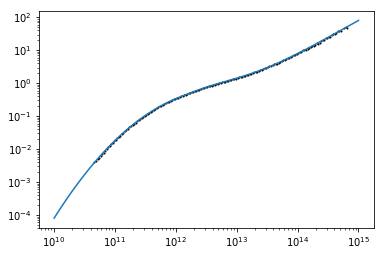

In [409]:
ntot=np.load('hod.npy')
plt.loglog(halo_mass,mean_ncen+mean_nsat)
#plt.loglog(halo_mass,mean_nsat)
plt.scatter((mbins[1:]+mbins[:-1])/2,ntot/mhist,s=1,color='Black')
#plt.ylim(0.001,10)
#plt.xlim(10**11,10**14)

In [392]:
mbins

array([1.00000000e+10, 1.05925373e+10, 1.12201845e+10, 1.18850223e+10,
       1.25892541e+10, 1.33352143e+10, 1.41253754e+10, 1.49623566e+10,
       1.58489319e+10, 1.67880402e+10, 1.77827941e+10, 1.88364909e+10,
       1.99526231e+10, 2.11348904e+10, 2.23872114e+10, 2.37137371e+10,
       2.51188643e+10, 2.66072506e+10, 2.81838293e+10, 2.98538262e+10,
       3.16227766e+10, 3.34965439e+10, 3.54813389e+10, 3.75837404e+10,
       3.98107171e+10, 4.21696503e+10, 4.46683592e+10, 4.73151259e+10,
       5.01187234e+10, 5.30884444e+10, 5.62341325e+10, 5.95662144e+10,
       6.30957344e+10, 6.68343918e+10, 7.07945784e+10, 7.49894209e+10,
       7.94328235e+10, 8.41395142e+10, 8.91250938e+10, 9.44060876e+10,
       1.00000000e+11, 1.05925373e+11, 1.12201845e+11, 1.18850223e+11,
       1.25892541e+11, 1.33352143e+11, 1.41253754e+11, 1.49623566e+11,
       1.58489319e+11, 1.67880402e+11, 1.77827941e+11, 1.88364909e+11,
       1.99526231e+11, 2.11348904e+11, 2.23872114e+11, 2.37137371e+11,
      

In [393]:
theo_Ntot=np.zeros(20)
theo_tot_mvir=np.zeros(20)
meas_Ntot=np.zeros(20)
for i in range(20):
    model.populate_mock(halocat = halocat)
    halo_table = model.mock.halo_table
    gal_table = model.mock.galaxy_table
    mean_ncen = model.mean_occupation_centrals(prim_haloprop = halo_table['halo_mvir'])
    mean_nsat = model.mean_occupation_satellites(prim_haloprop = halo_table['halo_mvir'])
    theo_Ntot[i] += np.sum(mean_ncen+mean_nsat)
    theo_tot_mvir[i] += np.sum(halo_table['halo_mvir'])
    meas_Ntot[i] += np.sum(len(gal_table))

In [394]:
print(np.mean(mean_ntot),np.mean(tot_gals))

102499.796875 102562.2


(array([2., 2., 1., 2., 2., 2., 2., 3., 2., 2.]),
 array([102166. , 102243.2, 102320.4, 102397.6, 102474.8, 102552. ,
        102629.2, 102706.4, 102783.6, 102860.8, 102938. ]),
 <a list of 10 Patch objects>)

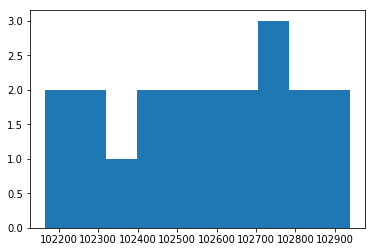

In [330]:
plt.hist(tot_gals,10)

In [ ]:
plt.